In [ ]:
import torch
import torchvision
from torch import nn
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
import torchvision.models as models

# set up the pretrained ViT for fine-tuning
pretrained_vit_weights = torchvision.models.ViT_B_16_Weights.DEFAULT

pretrained_vit = torchvision.models.vit_b_16(weights=pretrained_vit_weights).to(device)

for param in pretrained_vit.parameters():
    param.requires_grad = False

# # Different weight configuration used while running experiments
# dropout_prob = 0.3
# pretrained_vit.heads = nn.Sequential(
#     nn.Linear(in_features=768, out_features=4096),
#     nn.ReLU(inplace=True),
#     # nn.Dropout(p=dropout_prob),
#     nn.Linear(4096, 250)
# ).to(device)

pretrained_vit.heads = nn.Linear(in_features=768, out_features=250).to(device)

print(pretrained_vit)

Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:03<00:00, 87.6MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
!pip install -q torchinfo

In [ ]:
from torchinfo import summary

summary(model=pretrained_vit,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
VisionTransformer (VisionTransformer)                        [32, 3, 224, 224]    [32, 250]            768                  Partial
├─Conv2d (conv_proj)                                         [32, 3, 224, 224]    [32, 768, 14, 14]    (590,592)            False
├─Encoder (encoder)                                          [32, 197, 768]       [32, 197, 768]       151,296              False
│    └─Dropout (dropout)                                     [32, 197, 768]       [32, 197, 768]       --                   --
│    └─Sequential (layers)                                   [32, 197, 768]       [32, 197, 768]       --                   False
│    │    └─EncoderBlock (encoder_layer_0)                   [32, 197, 768]       [32, 197, 768]       (7,087,872)          False
│    │    └─EncoderBlock (encoder_layer_1)                   [32, 197, 768]       [32, 

In [ ]:
import os
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
zip_file_path = "/content/drive/MyDrive/simple_sketch_dataset.zip" # file path might differ depending on where in google drive the zip file is saved

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("Dataset_simple_sketch")

In [ ]:
file_path = "/content/Dataset_simple_sketch/png/filelist.txt"

# remove a txt file from the zip
if os.path.exists(file_path):
    os.remove(file_path)
    print(f"File {file_path} has been deleted.")
else:
    print(f"The file {file_path} does not exist.")

File /content/Dataset_simple_sketch/png/filelist.txt has been deleted.


In [ ]:
from sklearn.model_selection import train_test_split
import shutil

# make seperate directories for train and test
dataset_dir = "/content/Dataset_simple_sketch/png"
train_dir = "/content/Dataset_simple_sketch/train"
test_dir = "/content/Dataset_simple_sketch/test"

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

In [ ]:
folders = os.listdir(dataset_dir)
folders

['dog',
 'trousers',
 'mug',
 'parrot',
 'tent',
 'tv',
 'ant',
 'key',
 'harp',
 'bookshelf',
 'suv',
 'arm',
 'door',
 'present',
 'microscope',
 'santa claus',
 'car (sedan)',
 'cup',
 'crane (machine)',
 'revolver',
 'windmill',
 'standing bird',
 'brain',
 'wheelbarrow',
 'ladder',
 'basket',
 'bathtub',
 'tractor',
 'fire hydrant',
 'frog',
 'foot',
 'fan',
 'hand',
 'chandelier',
 'bulldozer',
 'power outlet',
 'human-skeleton',
 'pretzel',
 'person sitting',
 'shovel',
 'spider',
 'bowl',
 'sword',
 'door handle',
 'ipod',
 'crab',
 'seagull',
 'kangaroo',
 'tomato',
 'radio',
 'hat',
 'suitcase',
 'van',
 'truck',
 'rabbit',
 'scissors',
 'bottle opener',
 'barn',
 'envelope',
 'bus',
 't-shirt',
 'computer-mouse',
 'speed-boat',
 'grenade',
 'pen',
 'snowboard',
 'teapot',
 'trumpet',
 'mouth',
 'face',
 'snail',
 'wheel',
 'shoe',
 'flying saucer',
 'skyscraper',
 'donut',
 'crown',
 'mosquito',
 'ship',
 'boomerang',
 'cake',
 'rainbow',
 'zebra',
 'moon',
 'mailbox',
 'tir

In [ ]:
# Copy the images from the main dir to the train dir and test dir
for folder in folders:
    folder_path = os.path.join(dataset_dir, folder)
    train_folder_path = os.path.join(train_dir, folder)
    test_folder_path = os.path.join(test_dir, folder)

    os.makedirs(train_folder_path, exist_ok=True)
    os.makedirs(test_folder_path, exist_ok=True)

    images = os.listdir(folder_path)

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for image in train_images:
        src = os.path.join(folder_path, image)
        dst = os.path.join(train_folder_path, image)
        shutil.copy(src, dst)

    for image in test_images:
        src = os.path.join(folder_path, image)
        dst = os.path.join(test_folder_path, image)
        shutil.copy(src, dst)

In [ ]:
from torchvision import transforms

# # Different image transforms used during experiments
# transform = transforms.Compose([
#     transforms.RandomRotation(30),
#     transforms.RandomResizedCrop(224),
#     transforms.RandomHorizontalFlip(),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#     transforms.ToTensor()
# ])

pretrained_vit_transforms = pretrained_vit_weights.transforms()

In [ ]:
# importing helper functions from the https://github.com/mrdbourke/pytorch-deep-learning repository
try:
  from going_modular.going_modular import data_setup, engine
  from helepr_functions import download_data, plot_loss_curves
except:
  print(f"Could not find going modular or helper_functions...")
  !git clone https://github.com/mrdbourke/pytorch-deep-learning
  !mv pytorch-deep-learning/going_modular .
  !mv pytorch-deep-learning/helper_functions.py .
  !rm -rf pytorch-deep-learning
  from going_modular.going_modular import data_setup, engine
  from helper_functions import download_data, set_seeds, plot_loss_curves

Could not find going modular or helper_functions...
Cloning into 'pytorch-deep-learning'...
remote: Enumerating objects: 4056, done.
remote: Total 4056 (delta 0), reused 0 (delta 0), pack-reused 4056
Receiving objects: 100% (4056/4056), 646.90 MiB | 13.86 MiB/s, done.
Resolving deltas: 100% (2371/2371), done.
Updating files: 100% (248/248), done.


In [ ]:
# dataloaders
train_dataloader_pretrained, test_dataloader_pretrained, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                                                     test_dir=test_dir,
                                                                                                     transform=pretrained_vit_transforms,
                                                                                                     batch_size=32)


In [ ]:
from going_modular.going_modular import engine

optimizer = torch.optim.Adam(params=pretrained_vit.parameters(),
                             lr=1e-3)
loss_fn = torch.nn.CrossEntropyLoss()

pretrained_vit_results = engine.train(model=pretrained_vit,
                                      train_dataloader=train_dataloader_pretrained,
                                      test_dataloader=test_dataloader_pretrained,
                                      optimizer=optimizer,
                                      loss_fn=loss_fn,
                                      epochs=10,
                                      device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.1958 | train_acc: 0.3457 | test_loss: 2.2272 | test_acc: 0.4970
Epoch: 2 | train_loss: 1.8352 | train_acc: 0.5704 | test_loss: 1.8771 | test_acc: 0.5360
Epoch: 3 | train_loss: 1.4730 | train_acc: 0.6408 | test_loss: 1.7305 | test_acc: 0.5763
Epoch: 4 | train_loss: 1.2780 | train_acc: 0.6804 | test_loss: 1.5992 | test_acc: 0.5907
Epoch: 5 | train_loss: 1.1248 | train_acc: 0.7133 | test_loss: 1.5602 | test_acc: 0.6065
Epoch: 6 | train_loss: 1.0197 | train_acc: 0.7419 | test_loss: 1.5157 | test_acc: 0.6082
Epoch: 7 | train_loss: 0.9240 | train_acc: 0.7641 | test_loss: 1.4916 | test_acc: 0.6190
Epoch: 8 | train_loss: 0.8525 | train_acc: 0.7793 | test_loss: 1.4736 | test_acc: 0.6195
Epoch: 9 | train_loss: 0.7867 | train_acc: 0.7969 | test_loss: 1.4610 | test_acc: 0.6192
Epoch: 10 | train_loss: 0.7290 | train_acc: 0.8118 | test_loss: 1.4831 | test_acc: 0.6130


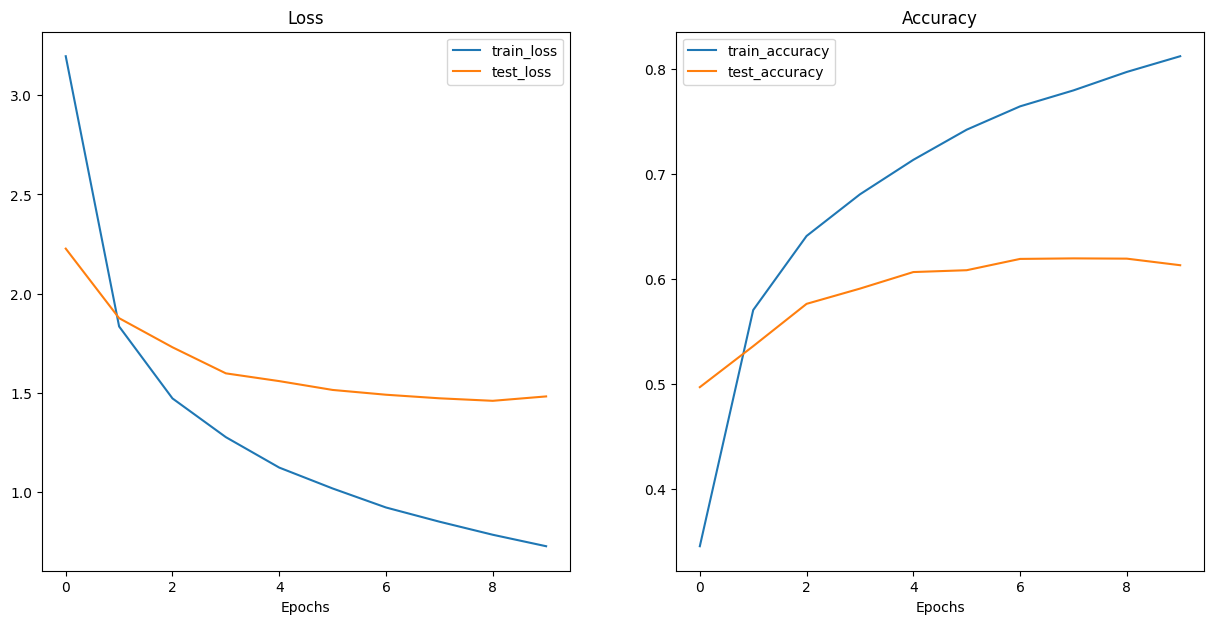

In [ ]:
from helper_functions import plot_loss_curves

plot_loss_curves(pretrained_vit_results)

In [ ]:
def get_label_from_path(image_path):
    '''
    get_label_from_path gives the label from the path

    :image_path: take a path as input in the format "path/to/dataset/label/image.png"
    :return: returns the label
    '''
    label = os.path.basename(os.path.dirname(image_path))
    return label

In [ ]:
from typing import List, Tuple
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: transforms.Compose = None,
                        device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    '''
    pred_and_plot_image plots and image and gives top 5 predictions


    :image_path: take a path as input in the format "path/to/dataset/label/image.png"
    :class_names: class of the image
    :image_size: width and height of the image
    :transform: transform of the iamge
    :return: an image and top 5 predictions
    '''

    img = Image.open(image_path)

    # Check for transform
    if transform is not None:
        image_transform = transform
    else:
        if img.mode == 'L':
            image_transform = transforms.Compose([
                transforms.Resize(image_size),
                transforms.Lambda(lambda x: x.convert('RGB')),  # Convert grayscale to RGB
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])
        else:
            image_transform = transforms.Compose([
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])

    # Run prediction on the given image
    model.to(device)
    model.eval()
    with torch.no_grad():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    top5_prob, top5_catid = torch.topk(target_image_pred_probs, 5)

    # sapce for an image plus predictions
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    lst_of_predictions = []

    # Plot the image
    ax[0].imshow(img)
    ax[0].set_title(get_label_from_path(image_path))
    ax[0].axis('off')
    lst_of_predictions.append(get_label_from_path(image_path))

    # Plot the top 5 predictions
    pred_str = "Top 5 Predictions:\n"
    for i in range(top5_prob.size(1)):
        pred_str += f"{class_names[top5_catid[0][i]]}: {top5_prob[0][i].item():.5f}\n"
        lst_of_predictions.append(f"{class_names[top5_catid[0][i]]} : {top5_prob[0][i].item():.5f}")

    ax[1].text(0.5, 0.5, pred_str, fontsize=12, ha='center', va='center')
    ax[1].axis('off')

    plt.show()

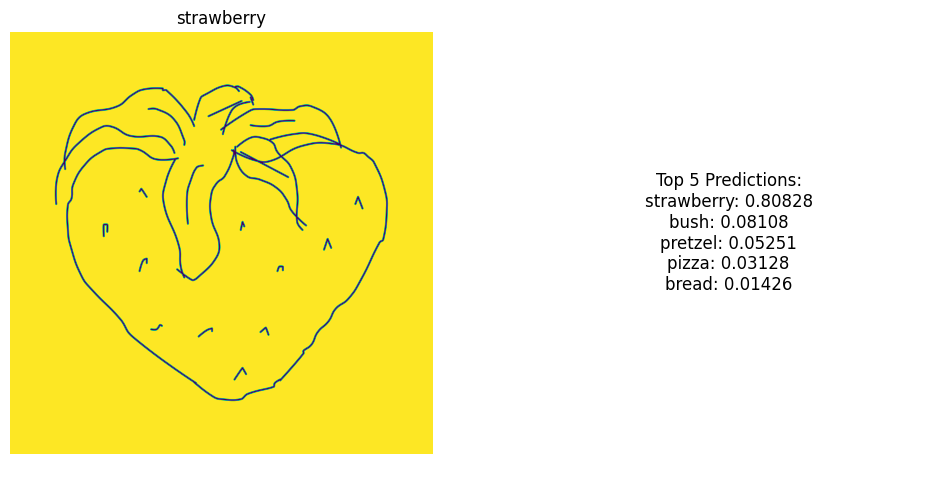

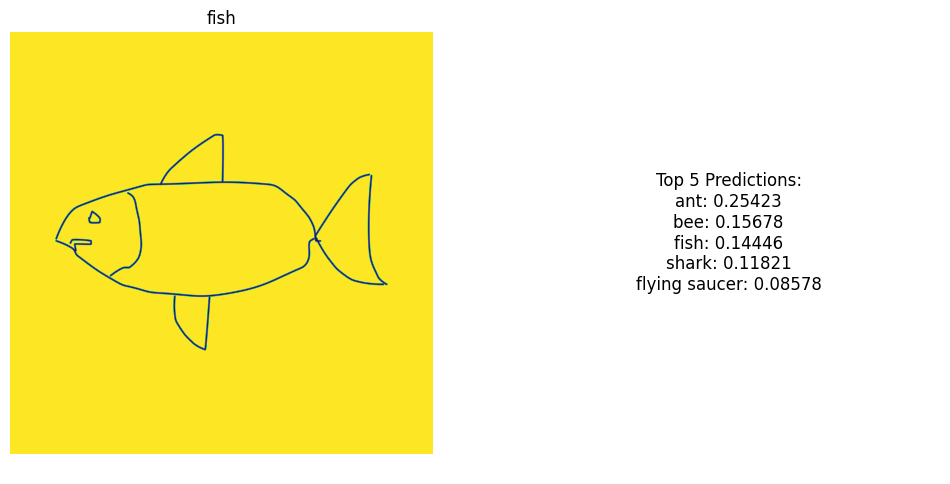

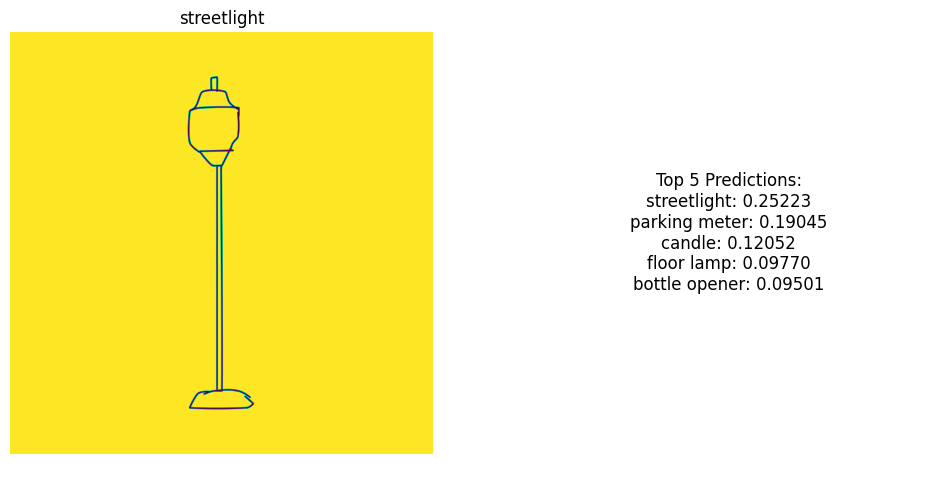

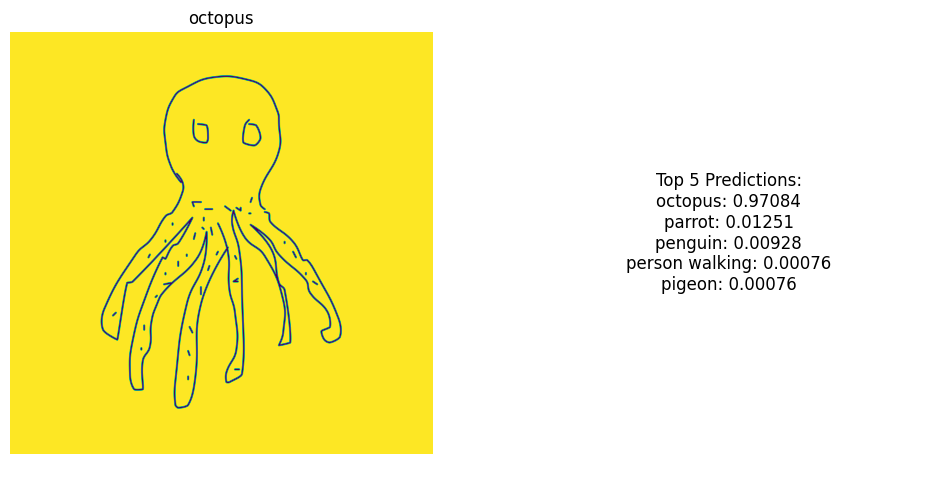

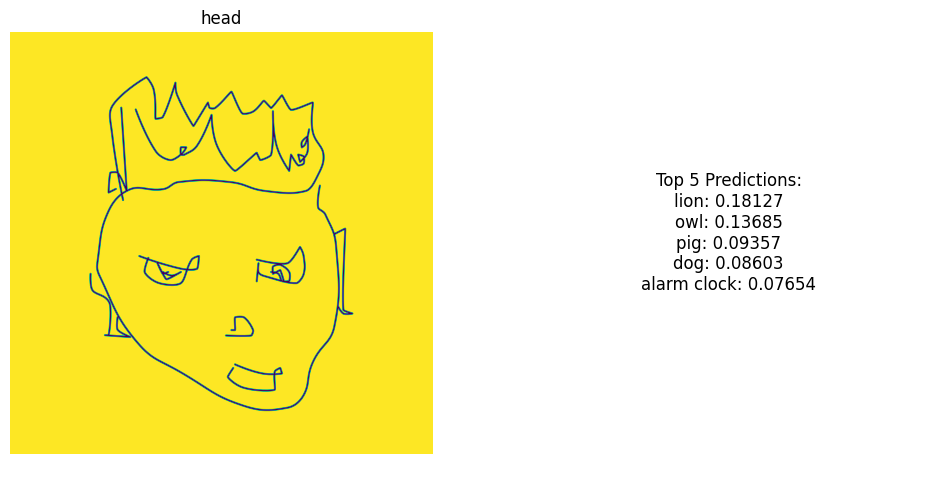

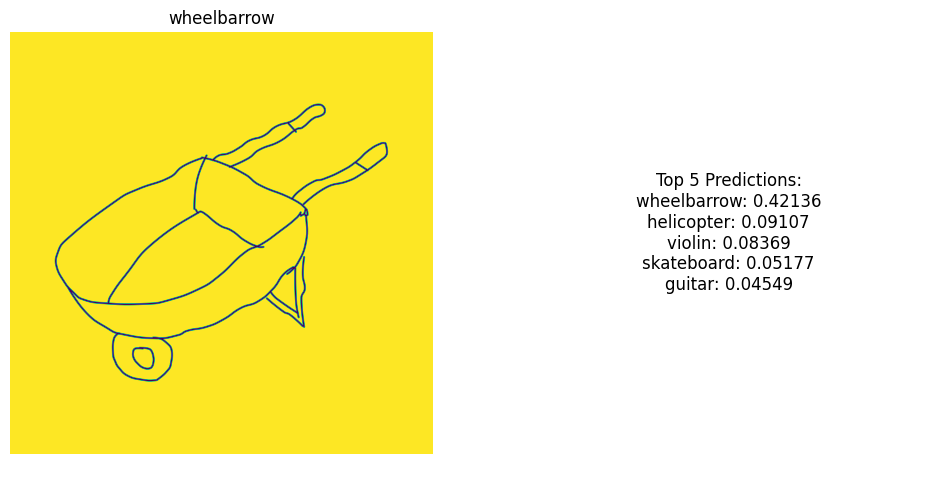

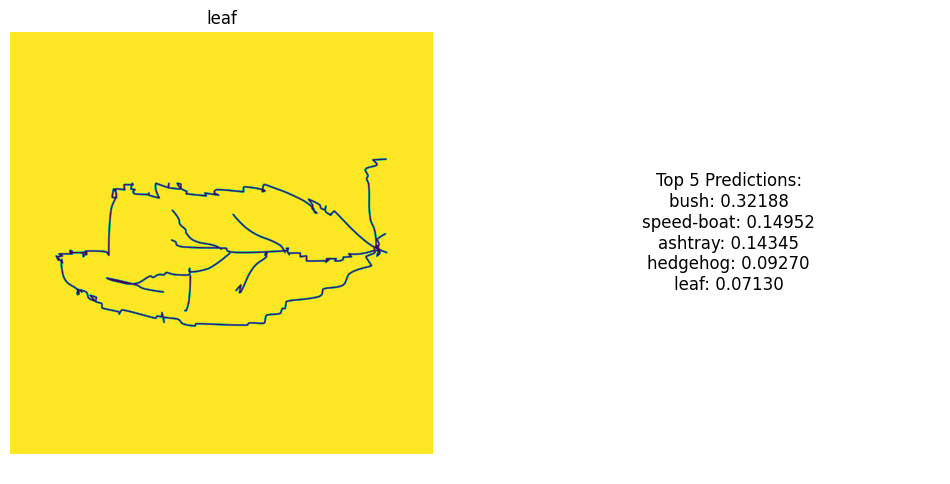

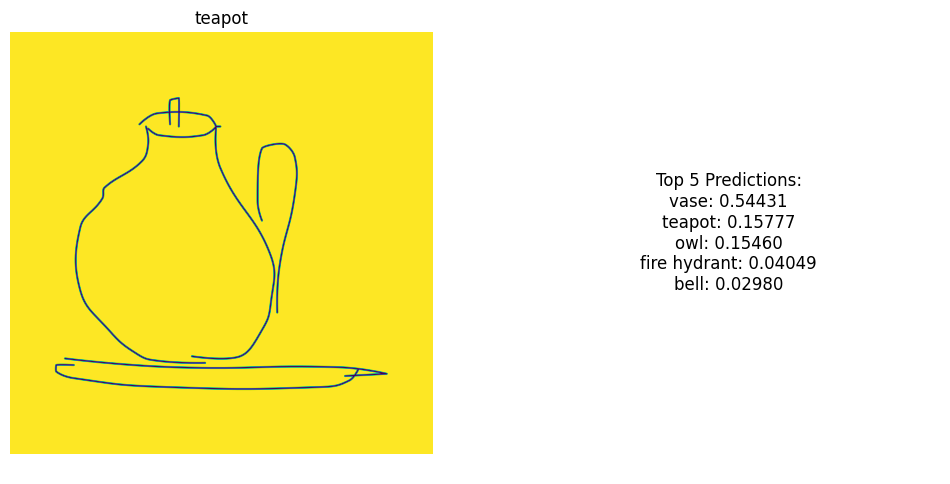

In [ ]:
from pathlib import Path
import random

# select random images from the testset
test_dir = "/content/Dataset_simple_sketch/test"
num_images_to_plot = 10
test_image_path_list = list(Path(test_dir).glob("*/*.png"))
test_image_path_sample = random.sample(population=test_image_path_list,
                                       k=num_images_to_plot)

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=pretrained_vit,
                        image_path=image_path,
                        class_names=class_names,
                        image_size=(224, 224))

In [ ]:
import torch
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tqdm.auto import tqdm
import numpy as np


def evaluate_model(model, dataloader, device, classes):
    '''
    evaluate_model gives evaluation metric for a model

    :model: model to be evaluated torch.nn.Module
    :dataloader: dataloader
    :device: cuda or cpu
    :classes: list of possible classes
    :return: classification report and confusion matrix
    '''
    model.eval()
    y_true = []
    y_pred = []

    # Model evaluation
    with torch.no_grad():
        for inputs, labels in tqdm(dataloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    class_names = [classes[i] for i in range(len(classes))]

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(35, 35))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Highest and lowest values and indexes in the confusion matrix
    max_value = cm.max()
    min_value = cm.min()
    max_index = np.unravel_index(np.argmax(cm), cm.shape)
    min_index = np.unravel_index(np.argmin(cm), cm.shape)

    print(f"Highest value: {max_value}, at indices: {max_index}")
    print(f"Lowest value: {min_value}, at indices: {min_index}")

    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

In [ ]:
def get_class_names(data_dir):
    """
    get_class_names get a list of classes


    :data_dir: directory of the folder wiht the classes
    :return: list of classes
    """
    class_names = [d.name for d in os.scandir(data_dir) if d.is_dir()]
    return class_names

In [ ]:
evaluate_model(pretrained_vit, test_dataloader_pretrained, device, get_class_names("/content/Dataset_simple_sketch/test"))

  0%|          | 0/125 [00:00<?, ?it/s]

Highest value: 16, at indices: (75, 75)
Lowest value: 0, at indices: (0, 1)
Classification Report:
                    precision    recall  f1-score   support

               dog       1.00      0.56      0.72        16
          trousers       0.54      0.88      0.67        16
               mug       1.00      0.19      0.32        16
            parrot       0.26      0.56      0.36        16
              tent       1.00      0.69      0.81        16
                tv       0.32      0.75      0.45        16
               ant       0.43      0.19      0.26        16
               key       0.34      0.81      0.48        16
              harp       0.72      0.81      0.76        16
         bookshelf       0.54      0.94      0.68        16
               suv       0.67      0.38      0.48        16
               arm       0.50      0.06      0.11        16
              door       0.88      0.44      0.58        16
           present       0.67      0.62      0.65        16


In [ ]:
# Path to the above classification report in csv format
file_path = '/content/drive/MyDrive/VIT_PREDICTIONS_DAY_5.csv'

import pandas as pd

df = pd.read_csv(file_path)
df

Unnamed: 0  precision  recall  f1-score  support
0          dog       1.00    0.56      0.72       16
1     trousers       0.54    0.88      0.67       16
2          mug       1.00    0.19      0.32       16
3       parrot       0.26    0.56      0.36       16
4         tent       1.00    0.69      0.81       16
..         ...        ...     ...       ...      ...
245    diamond       0.80    0.75      0.77       16
246  megaphone       0.87    0.81      0.84       16
247      rifle       1.00    0.88      0.93       16
248     candle       0.62    0.94      0.75       16
249      couch       0.54    0.81      0.65       16

[250 rows x 5 columns]

In [ ]:
df = df.dropna()

In [ ]:
top_precision = df.nlargest(5, 'precision')

top_recall = df.nlargest(5, 'recall')

top_f1_score = df.nlargest(5, 'f1-score')

print("Top 5 rows for precision:\n", top_precision)
print("\nTop 5 rows for recall:\n", top_recall)
print("\nTop 5 rows for F1-score:\n", top_f1_score)

Top 5 rows for precision:
      Unnamed: 0  precision  recall  f1-score  support
0           dog        1.0    0.56      0.72       16
2           mug        1.0    0.19      0.32       16
4          tent        1.0    0.69      0.81       16
17          cup        1.0    0.44      0.61       16
43  door handle        1.0    0.44      0.61       16

Top 5 rows for recall:
     Unnamed: 0  precision  recall  f1-score  support
75       donut       0.84     1.0      0.91       16
142     carrot       0.62     1.0      0.76       16
148     violin       0.80     1.0      0.89       16
169  motorbike       1.00     1.0      1.00       16
205      horse       0.80     1.0      0.89       16

Top 5 rows for F1-score:
     Unnamed: 0  precision  recall  f1-score  support
169  motorbike        1.0    1.00      1.00       16
99    armchair        1.0    0.94      0.97       16
118  pineapple        1.0    0.94      0.97       16
209      tooth        1.0    0.94      0.97       16
214       comb

In [ ]:
bottom_precision = df.nsmallest(25, 'precision')

bottom_recall = df.nsmallest(25, 'recall')

bottom_f1_score = df.nsmallest(25, 'f1-score')

print("Bottom 25 rows for precision:\n", bottom_precision)
print("\nBottom 25 rows for recall:\n", bottom_recall)
print("\nBottom 25 rows for F1-score:\n", bottom_f1_score)

Bottom 5 rows for precision:
          Unnamed: 0  precision  recall  f1-score  support
154          dragon       0.00    0.00      0.00       16
203          banana       0.00    0.00      0.00       16
15      santa claus       0.15    0.31      0.20       16
123           panda       0.20    0.75      0.32       16
217         stapler       0.20    0.06      0.10       16
147      cell phone       0.25    0.50      0.33       16
223             owl       0.25    0.12      0.17       16
3            parrot       0.26    0.56      0.36       16
32             hand       0.26    0.44      0.33       16
66           teapot       0.28    0.31      0.29       16
34        bulldozer       0.29    0.44      0.35       16
235       satellite       0.30    0.56      0.39       16
151      floor lamp       0.31    0.62      0.42       16
5                tv       0.32    0.75      0.45       16
224       lightbulb       0.32    0.50      0.39       16
36   human-skeleton       0.33    0.44    

In [ ]:
# get the 25 worst probabilites in a list
worst_categories = []

for i in bottom_f1_score["Unnamed: 0"]:
  worst_categories.append(i)

In [ ]:
worst_categories

['dragon',
 'banana',
 'stapler',
 'arm',
 'airplane',
 'pumpkin',
 'owl',
 'santa claus',
 'space shuttle',
 'shoe',
 'satellite dish',
 'ant',
 'teapot',
 'cow',
 'tomato',
 'trumpet',
 'alarm clock',
 'mug',
 'panda',
 'elephant',
 'hand',
 'zebra',
 'cell phone',
 'bulldozer',
 'binoculars']

In [ ]:
from typing import List, Tuple
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

def image_prediction(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: transforms.Compose = None,
                        device: torch.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')):
    '''
    image_prediction gives a dictinary with predictions for a path

    :model: model to be evaluated torch.nn.Module
    :dataloader: dataloader
    :device: cuda or cpu
    :classes: list of possible classes
    :return: dict of prediction
    '''

    img = Image.open(image_path)

    if transform is not None:
        image_transform = transform
    else:
        if img.mode == 'L':
            image_transform = transforms.Compose([
                transforms.Resize(image_size),
                transforms.Lambda(lambda x: x.convert('RGB')),  # Convert grayscale to RGB
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])
        else:
            image_transform = transforms.Compose([
                transforms.Resize(image_size),
                transforms.ToTensor(),
                transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
            ])

    model.to(device)
    model.eval()
    with torch.no_grad():
        transformed_image = image_transform(img).unsqueeze(dim=0)
        target_image_pred = model(transformed_image.to(device))

    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)
    top5_prob, top5_catid = torch.topk(target_image_pred_probs, 250)

    lst_of_predictions = {}


    lst_of_predictions["Path"] = image_path
    lst_of_predictions["Category"] = get_label_from_path(image_path)

    for i in range(top5_prob.size(1)):
        lst_of_predictions[class_names[top5_catid[0][i]]] = f"{top5_prob[0][i].item():.5f}"

    plt.show()

    return lst_of_predictions

In [ ]:
lst_of_worst_probs = []

for i in worst_categories:
  # get path to all of the worst predictions
  test_dir = "/content/Dataset_simple_sketch/test/" + i
  test_image_path_list = list(Path(test_dir).glob("*.png"))
  # evaluate the worst predictions
  for image_path in test_image_path_list:
      lst_of_worst_probs.append(image_prediction(model=pretrained_vit,
                          image_path=image_path,
                          class_names=class_names,
                          image_size=(224, 224)))

In [ ]:
lst_of_worst_probs

[{'Path': PosixPath('/content/Dataset_simple_sketch/test/dragon/5683.png'),
  'Category': 'dragon',
  'tiger': '0.50352',
  'dragon': '0.20974',
  'zebra': '0.08870',
  'lion': '0.05045',
  'horse': '0.02642',
  'scorpion': '0.01373',
  'owl': '0.00739',
  'bulldozer': '0.00651',
  'santa claus': '0.00550',
  'castle': '0.00487',
  'monkey': '0.00476',
  'sponge bob': '0.00415',
  'cow': '0.00394',
  'microscope': '0.00325',
  'person sitting': '0.00309',
  'seagull': '0.00302',
  'panda': '0.00301',
  'ashtray': '0.00299',
  'crab': '0.00253',
  'parrot': '0.00244',
  'mermaid': '0.00218',
  'train': '0.00215',
  'rooster': '0.00210',
  'pig': '0.00207',
  'frog': '0.00204',
  'dog': '0.00192',
  'bear (animal)': '0.00191',
  'person walking': '0.00170',
  'piano': '0.00158',
  'crocodile': '0.00155',
  'tv': '0.00149',
  'camel': '0.00143',
  'space shuttle': '0.00132',
  'pigeon': '0.00129',
  'sea turtle': '0.00123',
  'rollerblades': '0.00119',
  'satellite': '0.00117',
  'hedgeho

In [ ]:
df = pd.DataFrame(lst_of_worst_probs)
df.to_csv('/content/drive/MyDrive/lst_of_worst_day_5.csv', index=False)

In [ ]:
# copy the testset to google drive so then it can be used as input to BLIP-2
source_folder = '/content/Dataset_simple_sketch/test'

zip_file_path = '/content/ViT_day_5.zip'

with zipfile.ZipFile(zip_file_path, 'w') as zip_file:
    for foldername, subfolders, filenames in os.walk(source_folder):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zip_file.write(file_path, os.path.relpath(file_path, source_folder))

destination_zip_path = '/content/drive/My Drive/ViT_day_5.zip'

shutil.copy(zip_file_path, destination_zip_path)

'/content/drive/My Drive/ViT_day_5.zip'